<a href="https://colab.research.google.com/github/jyotiprasadkurmi/jyotiprasadkurmi/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and dataset


In [130]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Shape

In [34]:
df.shape

(8807, 12)

#Information about the Dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Datatypes

In [36]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [131]:
#checking NaN values in rating
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [132]:
#checking NaN values in country
df[df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [133]:
##checking NaN values in cast
df[df['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


In [134]:
#checking NaN values in date_added
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [135]:
#checking NaN values in duration
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


# filling the NaN positions

In [38]:
df['director'] = df['director'].fillna('Unspecified')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unspecified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unspecified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Splitting the Rows with Multiple values

In [40]:
## Converting the columns to string tyoe before splitting
df['director'] = df['director'].astype(str)
df['cast'] = df['cast'].astype(str)
df['country'] = df['country'].astype(str)
df['listed_in'] = df['listed_in'].astype(str)

In [41]:
#Splitting
a = df['director'].apply(lambda x: x.split(",")).tolist()
a
b = df['cast'].apply(lambda x : x.split(",")).tolist()
b
c = df['country'].apply(lambda x : x.split(",")).tolist()
c
d = df['listed_in'].apply(lambda x : x.split(",")).tolist()
d

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

#Creating a DF for splitted data

In [42]:
#director
df_a = pd.DataFrame(a,index = df['show_id']).stack().reset_index().drop(columns = 'level_1').rename(columns={0:'director'})
df_a

,show_id,director
0,s1,Kirsten Johnson
1,s2,Unspecified
2,s3,Julien Leclercq
3,s4,Unspecified
4,s5,Unspecified
...,...,...
9607,s8803,David Fincher
9608,s8804,Unspecified
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [43]:
#cast
df_b = pd.DataFrame(b,index = df['show_id']).stack().reset_index().drop(columns = 'level_1').rename(columns={0:'cast'})
df_b

,show_id,cast
0,s1,Unknown
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba
...,...,...
64946,s8807,Manish Chaudhary
64947,s8807,Meghna Malik
64948,s8807,Malkeet Rauni
64949,s8807,Anita Shabdish


In [44]:
#country
df_c = pd.DataFrame(c,index = df['show_id']).stack().reset_index().drop(columns = 'level_1').rename(columns={0:'country'})
df_c

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s4,United States
4,s5,India
...,...,...
10845,s8803,United States
10846,s8804,United States
10847,s8805,United States
10848,s8806,United States


In [45]:
#listed_in
df_d = pd.DataFrame(d,index = df['show_id']).stack().reset_index().drop(columns = 'level_1').rename(columns={0:'listed_in'})
df_d

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows
...,...,...
19318,s8806,Children & Family Movies
19319,s8806,Comedies
19320,s8807,Dramas
19321,s8807,International Movies


#Merging all the DataFrame with the Original DF

In [46]:
df_new = df.copy()

In [47]:
#merging director df with the original df
df_new1 = df_a.merge(df_new, on = 'show_id', how = 'left')
#removing duplicated columns and also renaming
df_new1 = df_new1.drop(columns = 'director_y').rename(columns = {'director_x':'director'})
df_new1.head()

,show_id,director,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Kirsten Johnson,Movie,Dick Johnson Is Dead,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Unspecified,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Julien Leclercq,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Unspecified,TV Show,Jailbirds New Orleans,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Unspecified,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
##merging cast,country and listed_in df with the original df
df_new2 = df_b.merge(df_new1, on = 'show_id', how = 'left').merge(df_c, on = 'show_id', how = 'left').merge(df_d, on = 'show_id', how = 'left')

df_new2

,show_id,cast_x,director,type,title,cast_y,country_x,date_added,release_year,rating,duration,listed_in_x,description,country_y,listed_in_y
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Documentaries
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Anita Shabdish,Mozez Singh,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,International Movies
202061,s8807,Anita Shabdish,Mozez Singh,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Music & Musicals
202062,s8807,Chittaranjan Tripathy,Mozez Singh,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Dramas
202063,s8807,Chittaranjan Tripathy,Mozez Singh,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,International Movies


In [49]:
#removing duplicated columns and renaming it
df_new2.drop(columns = ['cast_y','listed_in_x','country_x'], inplace = True)
df_new2

,show_id,cast_x,director,type,title,date_added,release_year,rating,duration,description,country_y,listed_in_y
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Documentaries
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Anita Shabdish,Mozez Singh,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,India,International Movies
202061,s8807,Anita Shabdish,Mozez Singh,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals
202062,s8807,Chittaranjan Tripathy,Mozez Singh,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,India,Dramas
202063,s8807,Chittaranjan Tripathy,Mozez Singh,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,India,International Movies


In [50]:
#renaming the column names
df_new2.rename(columns = {'cast_x':'cast','country_y':'country','listed_in_y':'listed_in'},inplace = True)

#Converting date_added column to Datetime


In [51]:
df_new2['date_added'] = pd.to_datetime(df_new2['date_added'],format = 'mixed')

In [52]:
#Extracting year from date_added
df_new2['Year'] = df_new2['date_added'].dt.year

In [53]:
df_new2.head()

,show_id,cast,director,type,title,date_added,release_year,rating,duration,description,country,listed_in,Year
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Documentaries,2021
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas,2021
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries,2021
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021


#splitting duration into movie_mins and No_of_seasons

In [54]:
#splitting duration into movie_mins and No_of_seasons
df_new2['duration'] = df_new2['duration'].astype(str)
df_new2['Movie_min'] = df_new2[df_new2['type']=='Movie']['duration'].apply(lambda x: x.split(" ")[0])
df_new2['Seasons_no'] = df_new2[df_new2['type']=='TV Show']['duration'].apply(lambda x: x.split(" ")[0])
df_new2.head()

,show_id,cast,director,type,title,date_added,release_year,rating,duration,description,country,listed_in,Year,Movie_min,Seasons_no
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Documentaries,2021,90,NaN
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,NaN,2
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas,2021,NaN,2
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries,2021,NaN,2
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,NaN,2


#filling the NAN value in Movie_min and Seasons_NO

In [55]:
df_new2.isnull().sum()

show_id              0
cast                 0
director             0
type                 0
title                0
date_added           0
release_year         0
rating              67
duration             0
description          0
country              0
listed_in            0
Year                 0
Movie_min        56148
Seasons_no      145917
dtype: int64

In [56]:
df_new2['Movie_min'] = df_new2['Movie_min'].fillna(0)
df_new2['Seasons_no'] = df_new2['Seasons_no'].fillna(0)
df_new2.head()

,show_id,cast,director,type,title,date_added,release_year,rating,duration,description,country,listed_in,Year,Movie_min,Seasons_no
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Documentaries,2021,90,0
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,0,2
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas,2021,0,2
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries,2021,0,2
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,0,2


#filling Unknowns in rating column

In [57]:
df_new2['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

*replacing '74 min', '84 min', '66 min', nan,*

In [58]:
#'74 min', '84 min', '66 min' need to fill this rating
df_new2['rating'] = df_new2['rating'].replace(['66 min', '74 min', '84 min'],np.nan)

In [60]:
df_new2['rating'] = df_new2['rating'].fillna(df_new2.groupby('type')['rating'].transform(lambda x : x.mode()[0]))
df_new2.head()

,show_id,cast,director,type,title,date_added,release_year,rating,duration,description,country,listed_in,Year,Movie_min,Seasons_no
0,s1,Unknown,Kirsten Johnson,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States,Documentaries,2021,90,0
1,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,0,2
2,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas,2021,0,2
3,s2,Ama Qamata,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries,2021,0,2
4,s2,Khosi Ngema,Unspecified,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,2021,0,2


In [61]:
df_new2['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

*Here all those time duration ratings have been replaced*


# **Data Analysis**

##Total titles in Netflix

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
total_titles = df_new2['show_id'].nunique()
total_titles

8807

*There are total 8807 titles*

#Content Types

In [64]:
no_shows = pd.DataFrame(df_new2.groupby('type')['show_id'].nunique()).reset_index()
no_shows.columns = ['type','NUmber of titles']
no_shows.head()

,type,NUmber of titles
0,Movie,6131
1,TV Show,2676


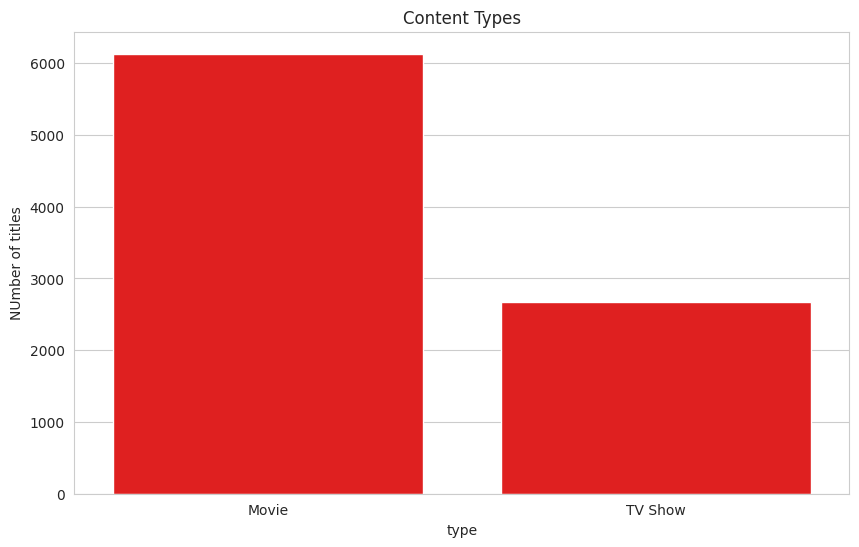

In [65]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = no_shows,x = 'type' ,y = 'NUmber of titles', color  = 'r')
plt.title("Content Types")
plt.show()

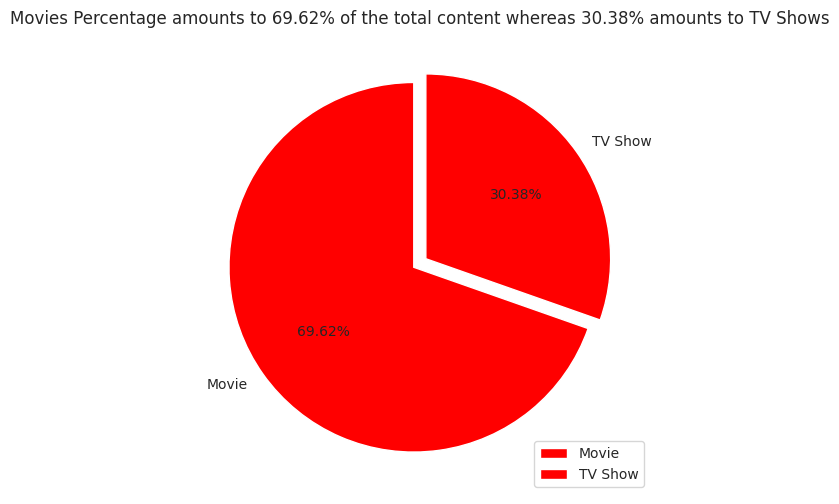

In [67]:
movies_percentage = round(df_new2[df_new2['type']=='Movie']['show_id'].nunique() / total_titles*100,2)
tv_shows_percentage = round(df_new2[df_new2['type']=='TV Show']['show_id'].nunique() / total_titles*100,2)


plt.figure(figsize=(10, 6))

types = np.array([movies_percentage,tv_shows_percentage])
label = ['Movie','TV Show']
plt.pie(types,labels = label,
        autopct='%.2f%%',colors = 'r',
        startangle = 90,
        explode = (0.04,0.04))
plt.title('Movies Percentage amounts to 69.62% of the total content whereas 30.38% amounts to TV Shows')
plt.legend(labels = label, loc = 'lower right')
plt.show()

*Movies Percentage amounts to 69.62% of the total content whereas 30.38% amounts to TV Shows*

#What Genre is common in NetFlix ?

In [68]:
df_listed_in = pd.DataFrame(df_new2.groupby('listed_in')['show_id'].nunique()).reset_index()
# df_listed_in
df_listed_in.columns = ['Genre','titles_number']

df_listed_in = df_listed_in.sort_values('titles_number',ascending = False).head(5)

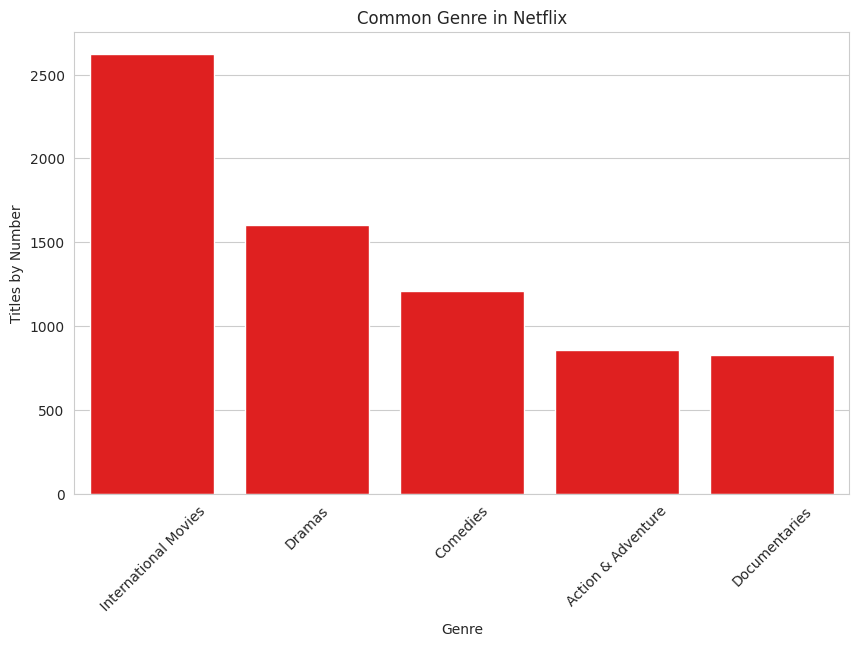

In [69]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_listed_in, x = 'Genre',y = 'titles_number',color = 'r')
plt.xlabel('Genre')
plt.ylabel('Titles by Number')
plt.xticks(rotation = 45)
plt.title('Common Genre in Netflix')
plt.show()

*Most xCommon Genre is International Movies*

#No of Shows based on type/category and rating

In [70]:
df_titles_by_rating_and_type = pd.DataFrame(df_new2.groupby(['rating','type'])['show_id'].nunique()).reset_index()
df_titles_by_rating_and_type

,rating,type,show_id
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,5
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,733


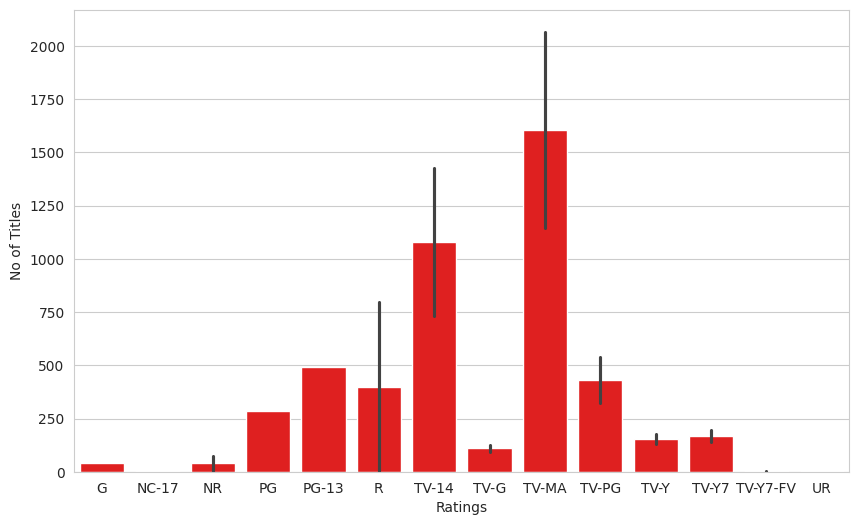

In [71]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_titles_by_rating_and_type, x = 'rating', y = 'show_id', color = 'r')
plt.xlabel('Ratings')
plt.ylabel('No of Titles')
plt.show()

#Which country has the highest production output of movies and TV shows?

In [72]:
df_country = pd.DataFrame(df_new2.groupby('country')['show_id'].nunique()).reset_index()
df_country.columns = ['country','No of Production']
df_country = df_country.sort_values('No of Production',ascending = False).head(10)

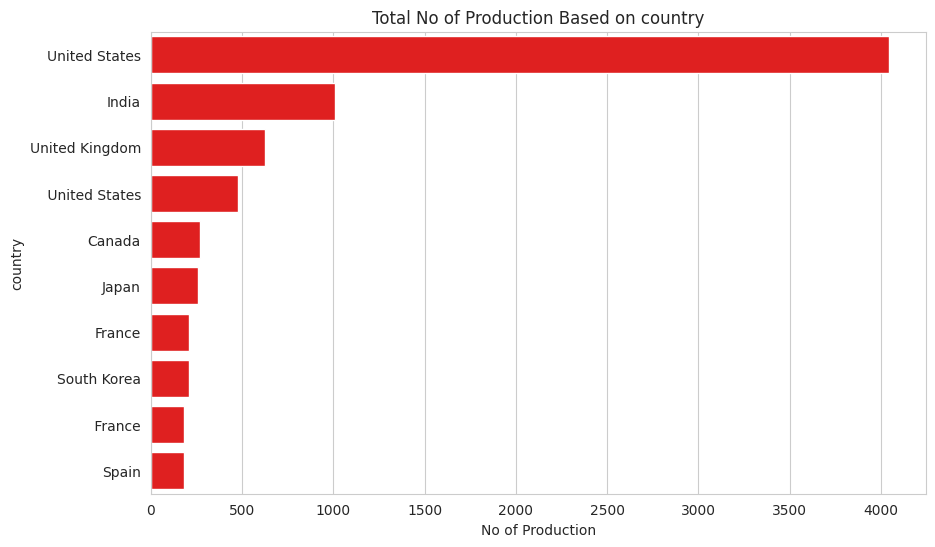

In [73]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_country, x = 'No of Production', y = 'country',color = 'r')
plt.title('Total No of Production Based on country')
plt.show()

#Content available across different countries

In [90]:
df_country = pd.DataFrame(df_new2.groupby(['type','country'])['show_id'].nunique()).reset_index()
df_country.columns = ['type','country','No of Production']
df_country = df_country.sort_values('No of Production',ascending = False).head(10)
df_country

,type,country,No of Production
181,Movie,United States,2804
287,TV Show,United States,1238
136,Movie,India,927
103,Movie,United States,388
180,Movie,United Kingdom,382
286,TV Show,United Kingdom,246
118,Movie,Canada,187
256,TV Show,Japan,174
277,TV Show,South Korea,164
32,Movie,France,155


In [104]:
df_country['No of Production'].sum()

6665

In [106]:
df_country.drop_duplicates()

,type,country,No of Production
181,Movie,United States,2804
287,TV Show,United States,1238
136,Movie,India,927
103,Movie,United States,388
180,Movie,United Kingdom,382
286,TV Show,United Kingdom,246
118,Movie,Canada,187
256,TV Show,Japan,174
277,TV Show,South Korea,164
32,Movie,France,155


<ipython-input-102-965f09ef087c>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.barplot(data = df_country, x = 'country', y = 'No of Production', hue='type',color = 'r')


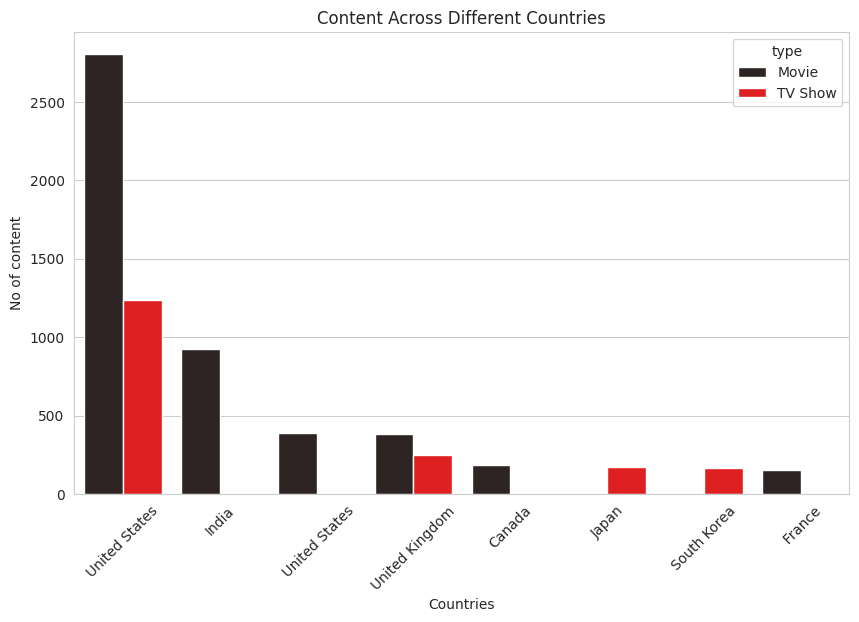

In [102]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(data = df_country, x = 'country', y = 'No of Production', hue='type',color = 'r')
plt.title("Content Across Different Countries")
plt.xlabel('Countries')
plt.ylabel('No of content')
plt.xticks(rotation = 45)
plt.show()

#Duration of content based on type

*Grouping the data by duration*

In [74]:
df_by_duration = pd.DataFrame(df_new2.groupby(['type','duration'])['show_id'].nunique()).reset_index()
df_by_duration.columns = ['type','duration','number of titles']
df_by_duration

,type,duration,number of titles
0,Movie,1 Season,3
1,Movie,10 min,1
2,Movie,100 min,108
3,Movie,101 min,116
4,Movie,102 min,122
...,...,...,...
216,TV Show,5 Seasons,65
217,TV Show,6 Seasons,33
218,TV Show,7 Seasons,23
219,TV Show,8 Seasons,17


*Checking duration for top 10 Movies*

In [75]:
movies_data = df_by_duration[df_by_duration['type'] == 'Movie']
movies_data_sorted = movies_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_movies_desc = movies_data_sorted.sort_values(by='number of titles', ascending=True)

Text(0, 0.5, 'Y-axis ')

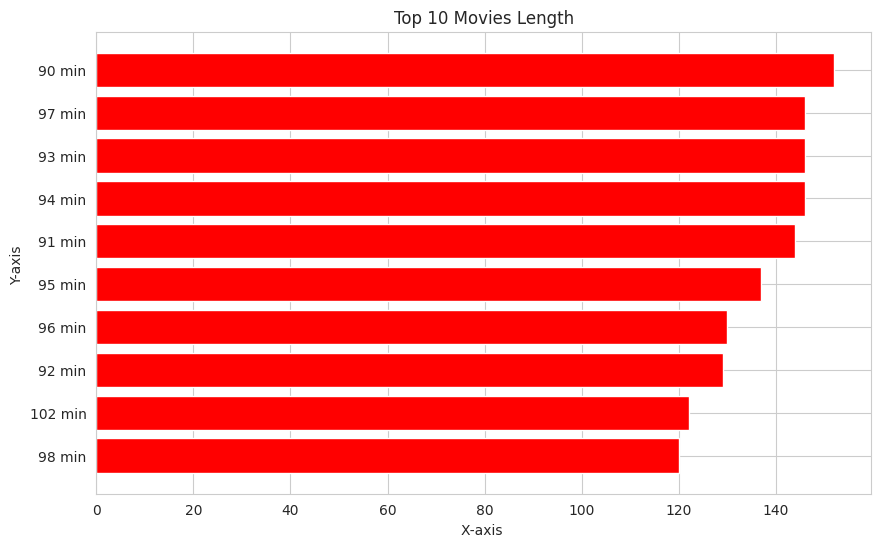

In [76]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

plt.barh(top_10_movies_desc['duration'], top_10_movies_desc['number of titles'], color='r')
plt.title("Top 10 Movies Length")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')


*Checking duration for top 10 TV Show*

In [77]:
tv_shows_data = df_by_duration[df_by_duration['type']=='TV Show']
tv_show_data_sorted = tv_shows_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_tv_show_desc = tv_show_data_sorted.sort_values(by='number of titles', ascending=True)

Text(0, 0.5, 'Y-axis ')

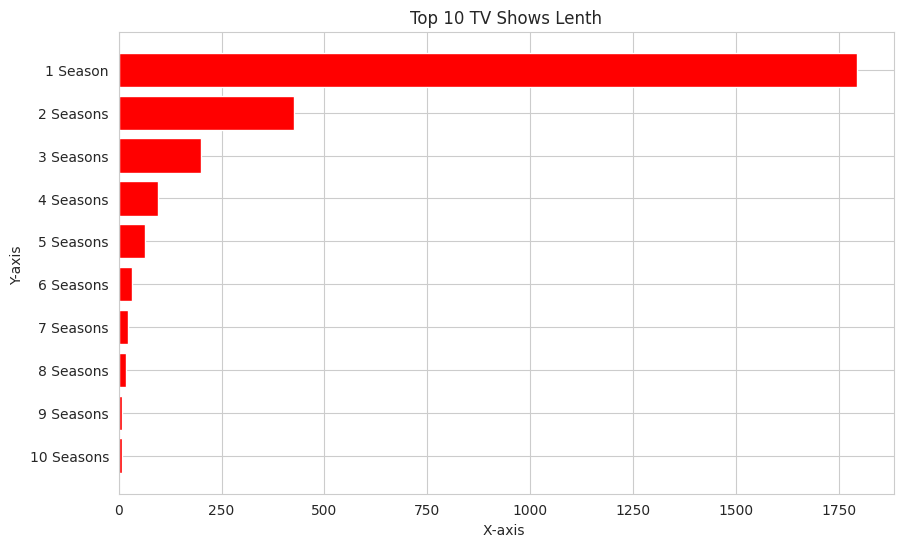

In [78]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.barh(top_10_tv_show_desc['duration'], top_10_tv_show_desc['number of titles'], color='r')
plt.title("Top 10 TV Shows Lenth")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

*Plotting in a subplot*

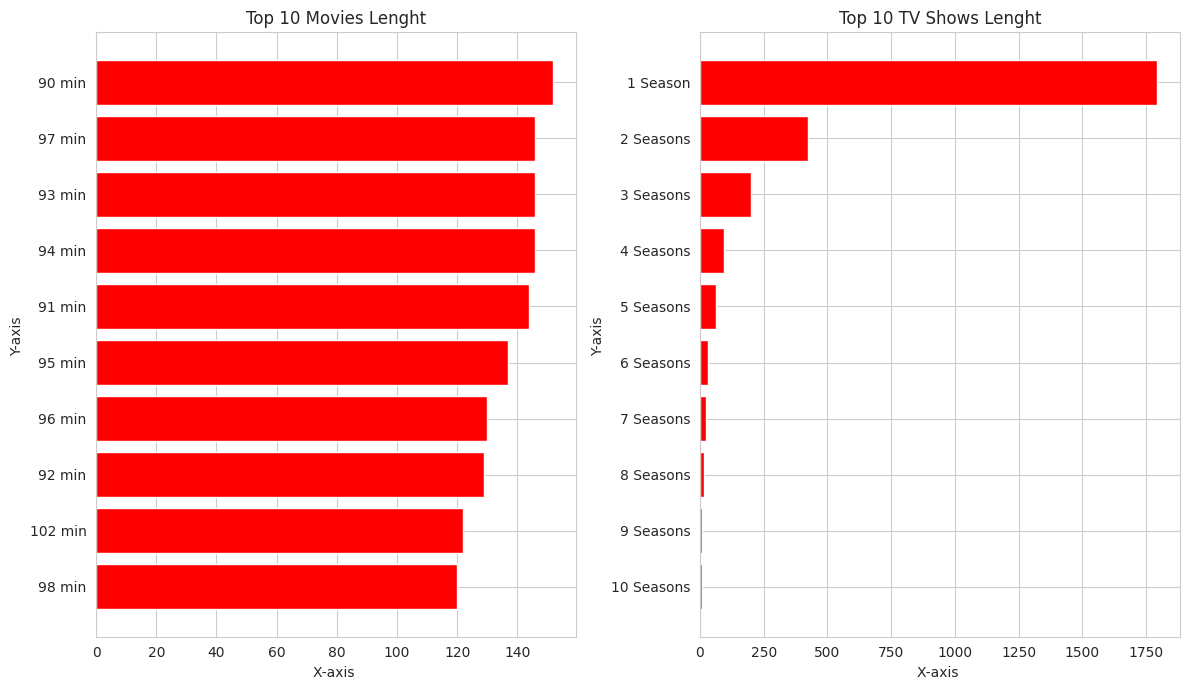

In [79]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")


plt.subplot(1, 2, 1)
plt.barh(top_10_movies_desc['duration'], top_10_movies_desc['number of titles'], color='r')
plt.title("Top 10 Movies Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2)
plt.barh(top_10_tv_show_desc['duration'], top_10_tv_show_desc['number of titles'], color='r')
plt.title("Top 10 TV Shows Lenght")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.tight_layout()
plt.show()

#Top 5 directors ranked by the number of titles they have produced

In [80]:
df_director = pd.DataFrame(df_new2.groupby('director')['show_id'].nunique()).reset_index()
df_director.columns = ['Director','No_of_titles']

directors_sort = df_director.sort_values(['No_of_titles','Director'], ascending = False).iloc[1:6]
directors_sort = directors_sort.sort_values('No_of_titles', ascending = True)
directors_sort

,Director,No_of_titles
4651,Suhas Kadav,16
3235,Marcus Raboy,16
4067,Raúl Campos,18
261,Jan Suter,18
4020,Rajiv Chilaka,22


Text(0, 0.5, 'No of titles')

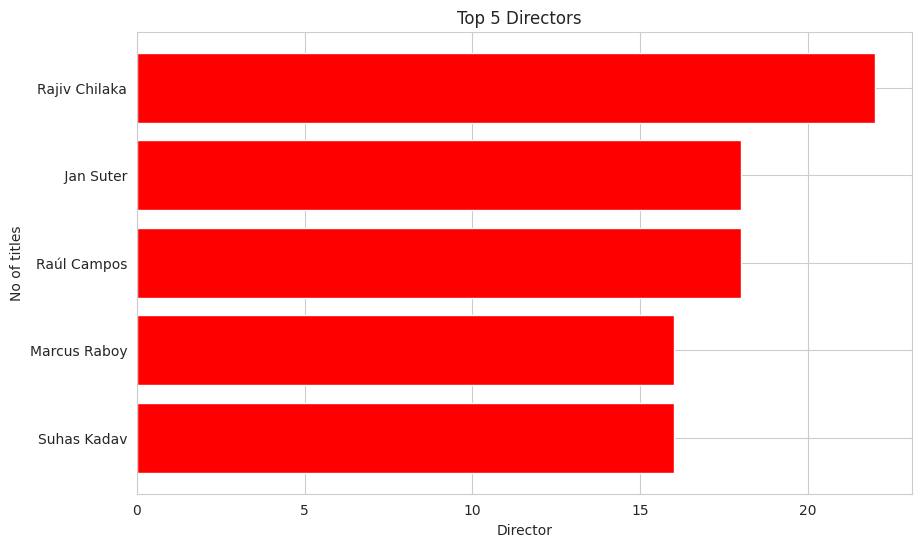

In [81]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.barh(directors_sort['Director'], directors_sort['No_of_titles'], color = 'r')
plt.title('Top 5 Directors  ')
plt.xlabel('Director')
plt.ylabel('No of titles')

#Addition of content over the year

In [82]:
df_titles_per_year = df_new2.groupby('Year')['show_id'].nunique().reset_index()
df_titles_per_year.columns = ['Year','Number of titles']

df_titles_after_2000 = df_titles_per_year[(df_titles_per_year['Year'] > 2000)]

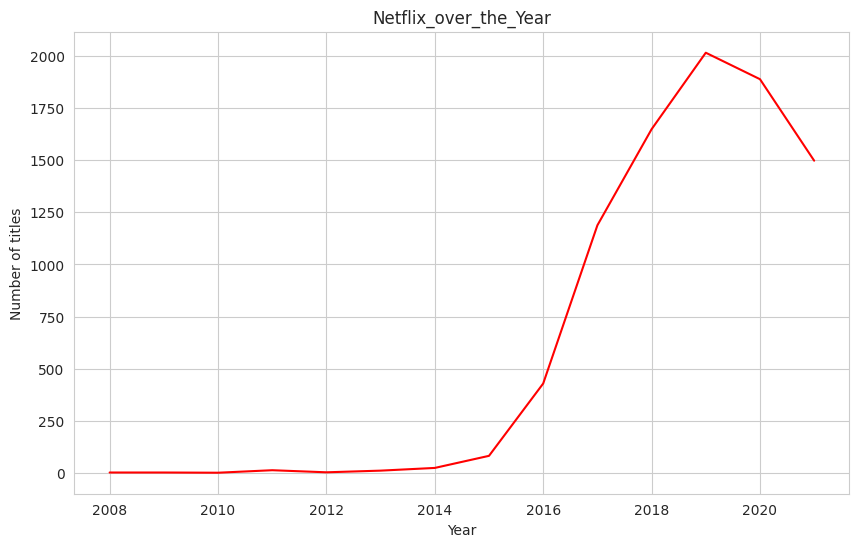

In [83]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data = df_titles_after_2000, x = 'Year', y = 'Number of titles', color = 'r')
plt.title('Netflix_over_the_Year')
plt.show()

#No of movies releases by year on Netflix

In [84]:
df_release_year = pd.DataFrame(df_new2.groupby(['type', 'release_year'])['show_id'].nunique()).reset_index()
df_release_year.columns = ['type','release_year','No_of_titles']

df_movie_time = df_release_year[df_release_year['type'] == 'Movie']
df_movie_time_sorted = df_movie_time.sort_values('release_year', ascending = False).head(10)
df_movie_time_sorted

,type,release_year,No_of_titles
72,Movie,2021,277
71,Movie,2020,517
70,Movie,2019,633
69,Movie,2018,767
68,Movie,2017,767
67,Movie,2016,658
66,Movie,2015,398
65,Movie,2014,264
64,Movie,2013,225
63,Movie,2012,173


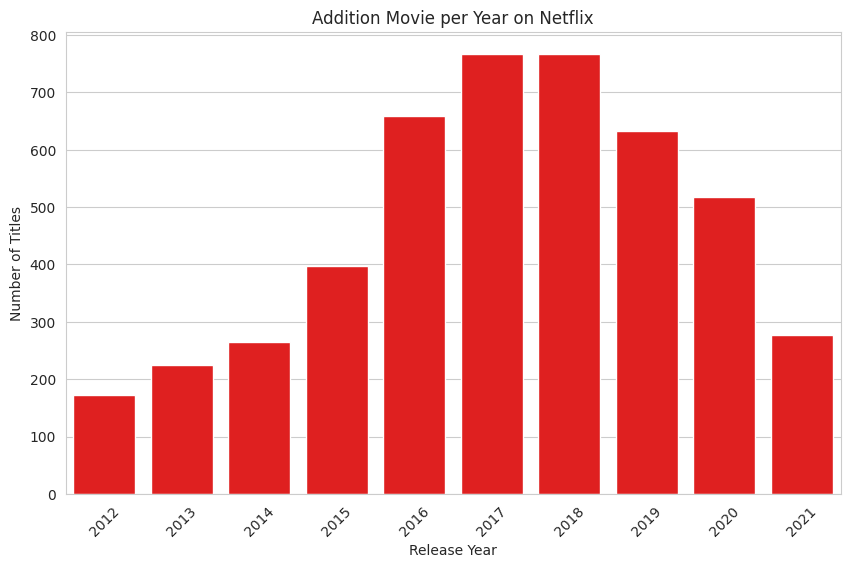

In [85]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='No_of_titles', data=df_movie_time_sorted, color = 'r')
plt.title('Addition Movie per Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.show()

#No of TV Show releases by year on Netflix

In [86]:
df_release_year = pd.DataFrame(df_new2.groupby(['type', 'release_year'])['show_id'].nunique()).reset_index()
df_release_year.columns = ['type','release_year','No_of_titles']

df_tv_time = df_release_year[df_release_year['type'] == 'TV Show']
df_tv_time_sorted = df_tv_time.sort_values('release_year', ascending = False).head(10)
df_tv_time_sorted

,type,release_year,No_of_titles
118,TV Show,2021,315
117,TV Show,2020,436
116,TV Show,2019,397
115,TV Show,2018,380
114,TV Show,2017,265
113,TV Show,2016,244
112,TV Show,2015,162
111,TV Show,2014,88
110,TV Show,2013,63
109,TV Show,2012,64


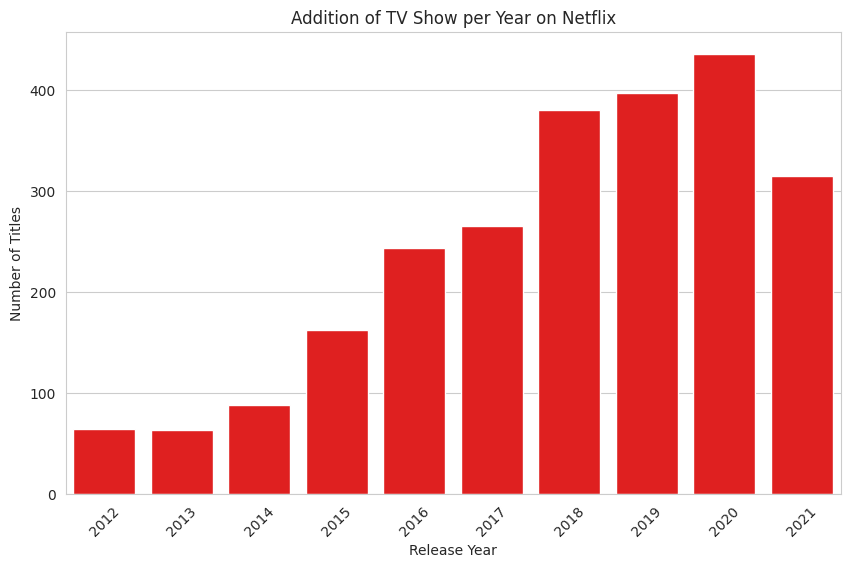

In [87]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='No_of_titles', data=df_tv_time_sorted, color = 'r')
plt.title('Addition of TV Show per Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.show()

#Distribution of Ratings for Movies and TV Shows

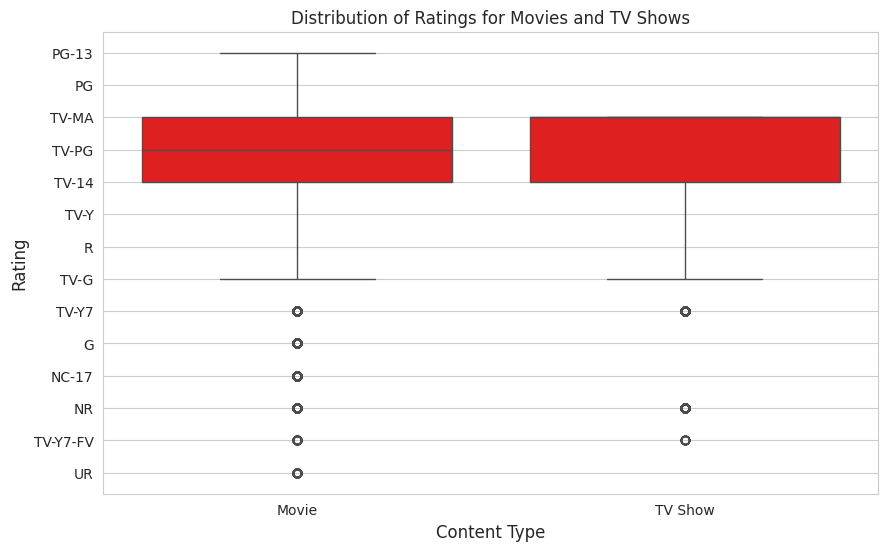

In [128]:
df_movies = df_new2[df_new2['type'] == 'Movie']
df_tv_shows = df_new2[df_new2['type'] == 'TV Show']

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=pd.concat([df_movies, df_tv_shows]), color = 'r')
plt.title('Distribution of Ratings for Movies and TV Shows')
plt.xlabel('Content Type',fontsize = 12)
plt.ylabel('Rating',fontsize = 12)
plt.show()

#Actors with Most no of Movie Content

In [110]:
df_actor = pd.DataFrame(df_new2.groupby(['type', 'cast'])['show_id'].nunique()).reset_index()
df_actor.columns = ['type','cast','No_of_shows']

df_actor_movie = df_actor[df_actor['type']=='Movie']
df_actor_movie_sort = df_actor_movie.sort_values('No_of_shows', ascending = False).head(10)
df_actor_movie_sort

,type,cast,No_of_shows
27674,Movie,Unknown,475
1946,Movie,Anupam Kher,38
16781,Movie,Om Puri,27
19235,Movie,Rupa Bhimani,27
27291,Movie,Shah Rukh Khan,26
17025,Movie,Paresh Rawal,25
3109,Movie,Boman Irani,25
11219,Movie,Julie Tejwani,24
24247,Movie,Akshay Kumar,23
18089,Movie,Rajesh Kava,21


*since .head(10) is also giving an unknown column, i have tried to use iloc selecting a range of columns*

In [126]:
df_actor_movie = df_actor[df_actor['type']=='Movie']
df_actor_movie_sort = df_actor_movie.sort_values('No_of_shows', ascending = False).iloc[1:11]
df_actor_movie_sort

,type,cast,No_of_shows
1946,Movie,Anupam Kher,38
16781,Movie,Om Puri,27
19235,Movie,Rupa Bhimani,27
27291,Movie,Shah Rukh Khan,26
17025,Movie,Paresh Rawal,25
3109,Movie,Boman Irani,25
11219,Movie,Julie Tejwani,24
24247,Movie,Akshay Kumar,23
18089,Movie,Rajesh Kava,21
11508,Movie,Kareena Kapoor,20


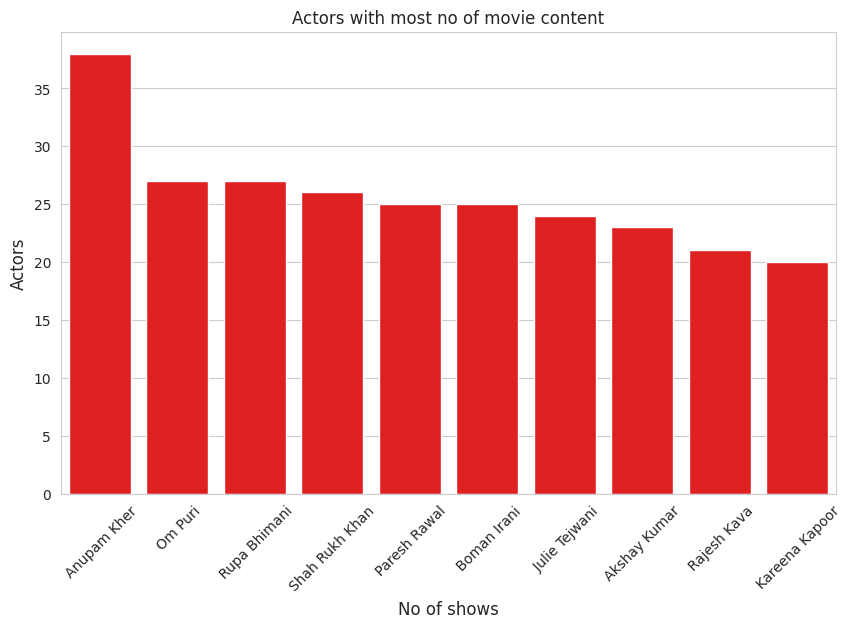

In [127]:
#Plotting
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_actor_movie_sort, x = 'cast', y = 'No_of_shows', color = 'r')
plt.xticks(rotation = 45)
plt.xlabel('No of shows',fontsize = 12)
plt.ylabel('Actors',fontsize = 12)
plt.title('Actors with most no of movie content')
plt.show()

#Actors with Most no of TV Show Content

In [119]:
df_actor = pd.DataFrame(df_new2.groupby(['type', 'cast'])['show_id'].nunique()).reset_index()
df_actor.columns = ['type','cast','No_of_shows']

df_actor_tv = df_actor[df_actor['type']=='TV Show']
df_actor_tv_sort = df_actor_movie.sort_values('No_of_shows', ascending = False).iloc[1:11]
df_actor_tv_sort

,type,cast,No_of_shows
39854,TV Show,Takahiro Sakurai,24
41084,TV Show,Yuki Kaji,17
34016,TV Show,Junichi Suwabe,17
28102,TV Show,Ai Kayano,17
30453,TV Show,Daisuke Ono,14
41803,TV Show,David Attenborough,14
39869,TV Show,Takehito Koyasu,13
41005,TV Show,Yoshimasa Hosoya,13
41068,TV Show,Yuichi Nakamura,13
34122,TV Show,Kana Hanazawa,12


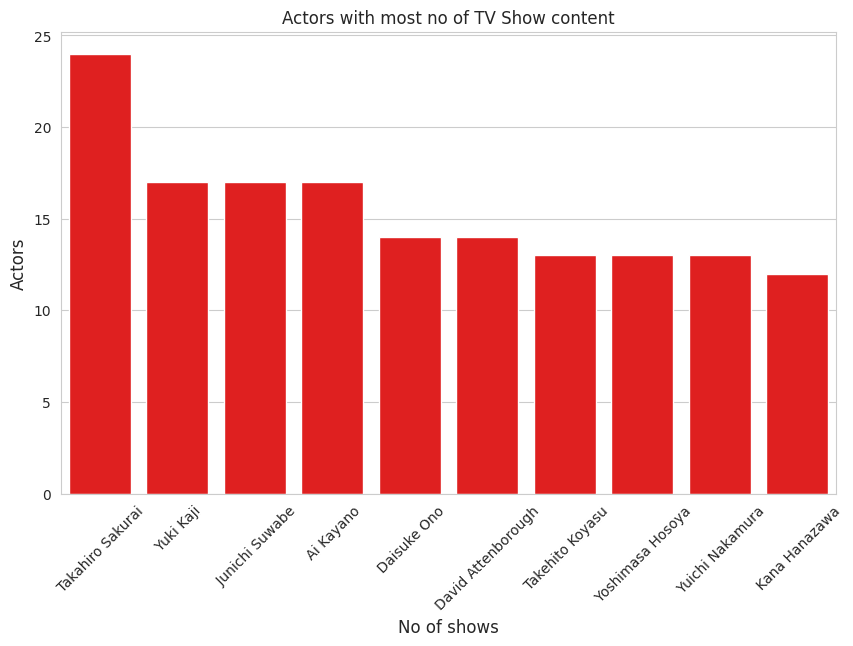

In [124]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_actor_tv_sort, x = 'cast', y = 'No_of_shows', color = 'r')
plt.xticks(rotation = 45)
plt.xlabel('No of shows', fontsize = 12)
plt.ylabel('Actors', fontsize = 12)
plt.title('Actors with most no of TV Show content')
plt.show()